In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'png'
import sklearn
from sklearn.manifold import TSNE
import seaborn as sns
from pylab import rcParams
from sklearn.cluster import KMeans
from sklearn import preprocessing
import tensorflow as tf
rcParams['figure.figsize'] = 12, 8

In [2]:
df = pd.read_csv('OnlineNewsPopularity.csv').sample(frac=1)
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [3]:
features = df.columns[df.dtypes == np.float64]
target = ' shares'

X = preprocessing.MinMaxScaler().fit_transform(df[features])
Y = np.log(df[target])

N = X.shape[0]

split = np.round(np.array([0.7, 0.85]) * N).astype(np.int)
X_t, X_cv, X_test = np.array_split(X, split)
Y_t, Y_cv, Y_test = np.array_split(Y.reshape(-1, 1), split)

In [4]:
class BatchGenerator():
    def __init__(self, X, Y):
        self.N, self.n = X.shape
        self.data = np.hstack([X, Y])
    def gen(self, batchSize):
        np.random.shuffle(self.data)
        for i in range(0, self.N, batchSize):
            yield \
                self.data[i:i+batchSize, :self.n], \
                self.data[i:i+batchSize, self.n:]

In [ ]:
XX = np.random.randint(0, 10, (12, 5))
YY = np.random.randint(10, 100, (12, 2))

print (XX, YY)

G = BatchGenerator(XX, YY)

for x, y in G.gen(1):
    print(x, y)
print()
for x, y in G.gen(5):
    print(x, y)

In [11]:
x = tf.placeholder(tf.float32, [None, 59], name="x")
y = tf.placeholder(tf.float32, [None, 1], name="y")

W_1 = tf.Variable(tf.random_normal(shape=[59,100], stddev=59**-0.5), name="weights")
b_1 = tf.Variable(tf.random_normal(shape=[1 ,100]), name="bias")
a_1 = tf.nn.tanh(tf.matmul(x, W_1) + b_1)

W_1a = tf.Variable(tf.random_normal(shape=[100,100], stddev=0.1), name="weights")
b_1a = tf.Variable(tf.constant(0.1, shape=[1 ,100]), name="bias")
a_1a = tf.nn.relu6(tf.matmul(x, W_1) + b_1)

W_2 = tf.Variable(tf.random_normal(shape=[100,80], stddev=0.1), name="weights")
b_2 = tf.Variable(tf.random_normal(shape=[1,80]), name="bias")
a_2 = tf.nn.relu6(tf.matmul(a_1a, W_2) + b_2)

W_3 = tf.Variable(tf.random_normal(shape=[80,30], stddev=0.1), name="weights")
b_3 = tf.Variable(tf.random_normal(shape=[1,1]), name="bias")
a_3 = tf.nn.relu(tf.matmul(a_2, W_3) + b_3)

l2w = sum(map(lambda x : tf.nn.l2_loss(x), [W_1, W_2, W_3]))
cost = tf.reduce_mean(tf.square(y - a_3)) + 0.005 * l2w
train_step = tf.train.MomentumOptimizer(1e-2, 0.9).minimize(cost)

terr = []

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    T = BatchGenerator(X_t, Y_t)
    
    for epoh in range(1000):
        for xs, ys in T.gen(128):
            sess.run(train_step, feed_dict={x: xs, y: ys})
        if epoh % 10 == 0:
            training_cost = sess.run(cost, feed_dict={
                    x:X_t,
                    y:Y_t
                })
            test_cost = sess.run(cost, feed_dict={
                        x: X_cv,
                        y: Y_cv
                    })
            terr = sess.run(y - a_3, feed_dict={
                    x: X_cv,
                    y: Y_cv
                })
            print ("[%3d] train: %15.10f, test: %15.10f" % \
                   (epoh, training_cost**0.5, test_cost**0.5))

[  0] train:    1.1645389068, test:    1.1549668280
[ 10] train:    0.9378241932, test:    0.9318871002
[ 20] train:    0.9055656612, test:    0.8979797524
[ 30] train:    0.9012802264, test:    0.8938530429
[ 40] train:    0.9030540280, test:    0.8894603543


KeyboardInterrupt: 

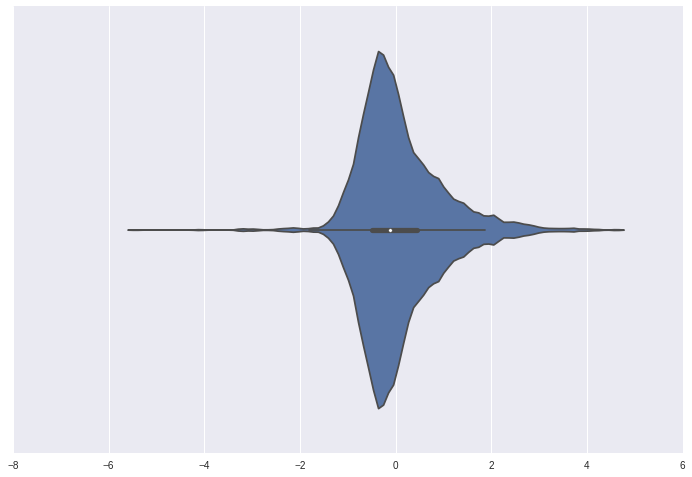

In [17]:
sns.violinplot(terr)

In [8]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(10, n_jobs=-1)
model.fit(X_t, Y_t)
Knn_cv = model.predict(X_cv)

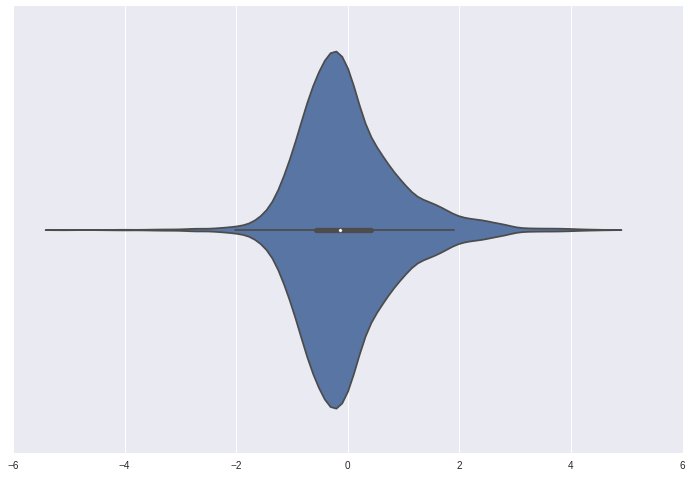

In [9]:
sns.violinplot(Y_cv - Knn_cv)

In [16]:
# sns.violinplot(pd.DataFrame.from_dict({'knn' : (Y_cv - Knn_cv), 'nn' : terr}))


ValueError: If using all scalar values, you must pass an index